# Question 1: How Has Gambling on March Madness Evolved Over Time?

첫 번째 질문에서는 March Madness 토너먼트에 대해, 라스베가스에서의 베팅 금액이 시간에 따라 어떻게 변화했는지를 살펴보도록 하겠습니다. 이를 그래프로 시각화하여, 베팅 규모가 어떤 추세를 보였는지 분석해보겠습니다.

## Step 1 : 데이터 크롤링
먼저, 웹크롤링을 통해 웹페이지에서 March Madness에 대한 베팅 금액 데이터를 가져옵니다.
이를 위해 `requests`와 `BeautifulSoup` 라이브러리를 사용하여 웹페이지를 요청하고, 데이터를 추출합니다.

In [20]:
import requests
from bs4 import BeautifulSoup

# 대상 URL
url = "https://www.boydsbets.com/much-bet-march-madness/"

# 사용자 브라우저인 척 하기 위한 헤더
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
}

# 웹페이지 요청
response = requests.get(url, headers=headers)
response.raise_for_status()  # 요청이 성공했는지 확인

# HTML 파싱
soup = BeautifulSoup(response.text, "html.parser")

# 첫 번째 테이블의 tbody 찾기
table = soup.find("table")
tbody = table.find("tbody")

# 연도와 금액 추출
for row in tbody.find_all("tr"):
    cells = row.find_all("td")
    if len(cells) >= 2:
        year = cells[0].get_text(strip=True)
        amt_wagered = cells[1].get_text(strip=True)
        print(year)
        print(amt_wagered)


2023
$458,189,114.78
2022
$387,176,056.34
2021
$378,512,048.19
2020
No Tournament
2019
$351,808,012.49
2018
$337,788,235.29
2017
$300,225,806.45
2016
$274,831,858.41
2015
$259,426,847.66
2014
$230,928,281.46
2013
$205,224,043.72
2012
$211,248,677.25
2011
$205,224,043.72
2010
$211,248,677.25
2009
$174,793,893.13
2008
$191,171,631.21
2007
$182,615,803.81
2006
$156,422,264.88
2005
$136,707,368.42
2004
$122,313,375.80


이 코드는 웹페이지에서 필요한 데이터 (연도, 베팅 금액)을 추출하고, 각 연도별로 베팅 금액을 출력합니다.

데이터 추출은 해당 웹페이지에 존재하는 2개의 `<table>` 태그 중 첫 번째의 테이블의 각 `<tr>`을 활용하여 추출하였습니다.

## Step 2 : csv 파일로 데이터 저장
웹에서 추출한 데이터를 csv 파일로 저장합니다. 이 csv 파일은 이후 Step 3에서 분석에 사용하겠습니다.

In [21]:
# csv 파일로 저장
import csv

with open("march_madness_wagers.csv", "w", newline='', encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Year", "Amount Wagered"])
    for row in tbody.find_all("tr"):
        cells = row.find_all("td")
        if len(cells) >= 2:
            year = cells[0].get_text(strip=True)
            amt_wagered = cells[1].get_text(strip=True)
            writer.writerow([year, amt_wagered])


이 단계에서는 `march_madness_wagers.csv`라는 이름의 파일로 데이터를 저장하고 있습니다. 이 파일은 아래 Step 3에서 데이터 분석에 사용됩니다.

## Step 3 : 데이터 분석 및 시각화
Step 2에서 저장했던 csv 파일에서 데이터를 불러와, 베팅 금액을 백만 달러 단위로 변환하여 분석합니다. 시각화 자료 (그래프)를 생성하기 위해 `matplotlib`를 사용하였으며, 숫자 계산(백만 달러 단위로 변환)을 위해 `numpy`를 사용하였습니다.

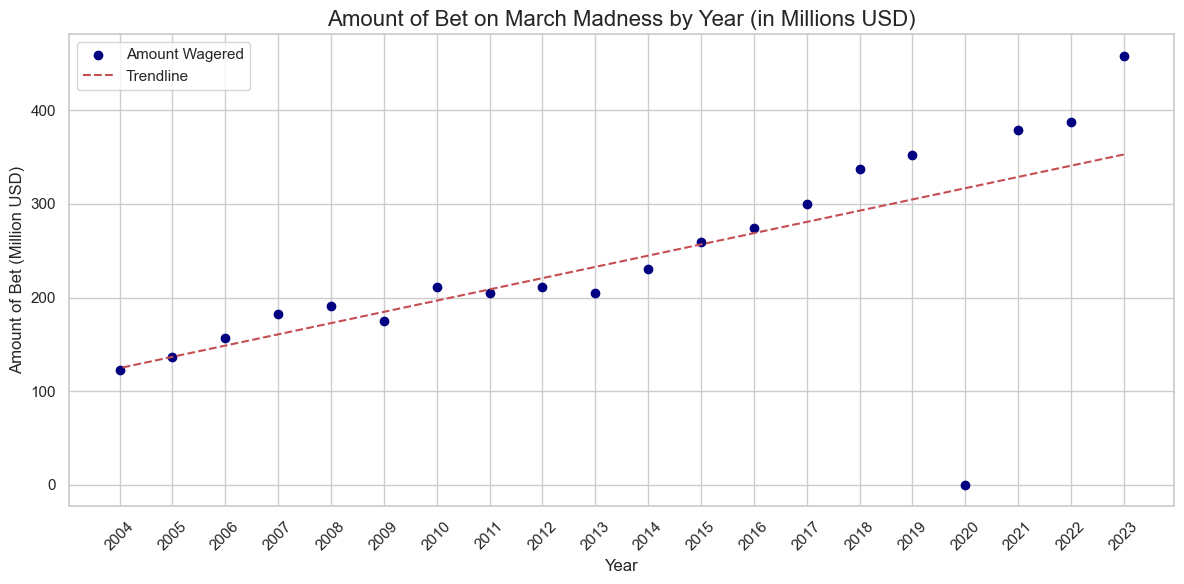

In [22]:
#시각화 자료
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# CSV 파일 불러오기
df = pd.read_csv("march_madness_wagers.csv")

# 금액 컬럼 처리 함수
def clean_amount(value):
    if value.strip().lower() == "no tournament":
        return 0.0
    value = value.replace('$', '').replace(',', '')
    return float(value) / 1_000_000  # 백만 달러 단위로 변환

# 적용
df['Amount (Million USD)'] = df['Amount Wagered'].apply(clean_amount)

# 연도는 정수형으로
df['Year'] = df['Year'].astype(int)

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Amount (Million USD)'], color='navy', label='Amount Wagered')

# 추세선 (선형)
z = np.polyfit(df['Year'], df['Amount (Million USD)'], 1)
p = np.poly1d(z)
plt.plot(df['Year'], p(df['Year']), "r--", label='Trendline')

# 라벨 설정
plt.title("Amount of Bet on March Madness by Year (in Millions USD)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Amount of Bet (Million USD)")
plt.xticks(df['Year'], rotation=45)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

이 코드는 March Madness 토너먼트에 대한 베팅 금액을 연도별로 시각화한 것이며, 선형 추세선을 추가하여 금액의 변화 추이를 쉽게 이해할 수 있습니다.

## Step 4 : 해석
2020년에는 코로나19 팬데믹으로 인해 토너먼트가 진행되지 않아 "no tournament"로 기록되었으며, 따라서 베팅 금액이 0으로 표시되었습니다.
그래프를 통해, March Madness에 대한 베팅 금액이 시간이 지남에 따라 상승하는 추세를 보이고 있음을 확인할 수 있으며, 이는 March Madness의 인기도가 점차 증가하고 있음을 의미합니다.

# Question 2: How Much Does The Viewership of The March Madness Championship Differ From That of The NBA Finals?

두 번째 질문에서는 NBA Finals와 NCAA March Madness Final의 뷰어십(시청률)을 비교해보겠습니다. 두 대회의 연도별 평균 시청률을 각 대회에 대한 웹크롤링을 통해 데이터를 추출하고, 시각화 및 비교를 위한 다양한 Python 라이브러리를 사용하였습니다.

## Step 1 : NBA Finals 뷰어십 데이터 크롤링 및 csv 저장
`NBA Finals`의 시청률 데이터를 웹에서 크롤링하여 `2000-2024년`까지의 연도별 평균 시청률을 구하고, 추출한 데이터를 csv 파일에 저장합니다.

사용된 라이브러리는 웹페이지 요청을 통해 데이터를 가져오기 위해 사용한 `requests`, 웹페이지에서 필요한 데이터를 파싱하는데 사용한 `BeautifulSoup`, 그리고 추출한 데이터를 csv 파일로 저장하기 위해 사용한 `csv`입니다.

In [23]:
# NBA 뷰어십
import requests
from bs4 import BeautifulSoup
import csv

# 웹페이지 URL
url = "https://www.sportsmediawatch.com/nba-finals-ratings-viewership-history/"

# HTTP 요청 헤더 설정
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0 Safari/537.36"
}

# 웹페이지 요청
response = requests.get(url, headers=headers)
response.raise_for_status()  # 요청이 성공했는지 확인
soup = BeautifulSoup(response.text, "html.parser") # HTML 파싱

# 연도 추출
years = []
for p in soup.find_all('p'):
    text = p.get_text(strip=True)
    if ":" in text:
        year_part = text.split(":")[0]
        if year_part.isdigit():
            year = int(year_part)
            if 2000 <= year <= 2024:
                years.append(year)

# 뷰어십 추출 (해당 연도별 평균 뷰어십으로 출력)
results = []
tables = soup.find_all("table")
for i, table in enumerate(tables):
    values = []
    rows = table.find_all("tr")[1:]  # 헤더 제외
    for row in rows:
        cols = row.find_all("td")
        if len(cols) >= 7:
            text = cols[6].get_text(strip=True)
            if "M" in text:
                try:
                    num = float(text.replace("M", "").strip())
                    values.append(num)
                except ValueError:
                    continue
    if values and i < len(years):  # 연도와 매칭 가능한 경우만
        avg = round(sum(values) / len(values), 2)
        results.append([years[i], f"{avg}M"])

# 결과 출력
for item in results:
    print(item)

# ✅ CSV로 저장
with open("nba_finals_viewership.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Year", "Average Viewership"])
    writer.writerows(results)

print("✅ CSV 저장 완료: nba_finals_viewership.csv")

[2024, '11.65M']
[2023, '11.64M']
[2022, '12.4M']
[2021, '10.13M']
[2020, '7.67M']
[2019, '15.13M']
[2018, '17.56M']
[2017, '20.43M']
[2016, '20.28M']
[2015, '19.94M']
[2014, '15.54M']
[2013, '17.47M']
[2012, '16.85M']
[2011, '17.39M']
[2010, '18.14M']
[2009, '14.29M']
[2008, '14.9M']
[2007, '9.29M']
[2006, '12.96M']
[2005, '12.62M']
[2004, '17.97M']
[2003, '9.83M']
[2002, '15.67M']
[2001, '18.98M']
[2000, '17.27M']
✅ CSV 저장 완료: nba_finals_viewership.csv


NBA의 뷰어십(시청률)의 경우, Final이 한 경기만 존재하는 것이 아닌 7전 4선승제로 진행되기 때문에, 매년 결승전의 각 경기들의 뷰어십을 평균화하여 평균값을 추출하였습니다.

추출 방식으로는 연도의 경우, `p` 태그로 감싸진 텍스트 중에서 연도 정보를 찾아내어 `2000-2024년` 사이의 연도만 추출하였고, 뷰어십의 경우, `<table>` 태그에서 `tr`을 활용하여 추출하였고 시청률 데이터는 `M` 단위로 제공되었기 때문에 `float`로 변환하여 평균을 계산했습니다.

이후, 추출된 연도와 시청률 데이터를 `nba_finals_viewership.csv` 파일로 저장하였습니다.

## Step 2 : NBA Finals 시청률 시각화
위에서 추출한 시청률 데이터를 시각화하기 위해, 저장한 csv 파일을 불러와 그래프를 생성하여 연도별 변화를 파악합니다.

사용한 라이브러리로는 그래프를 그리기 위해 `matplotlib`와 그래프의 스타일을 개선하기 위해 `seaborn`을 사용하였습니다.

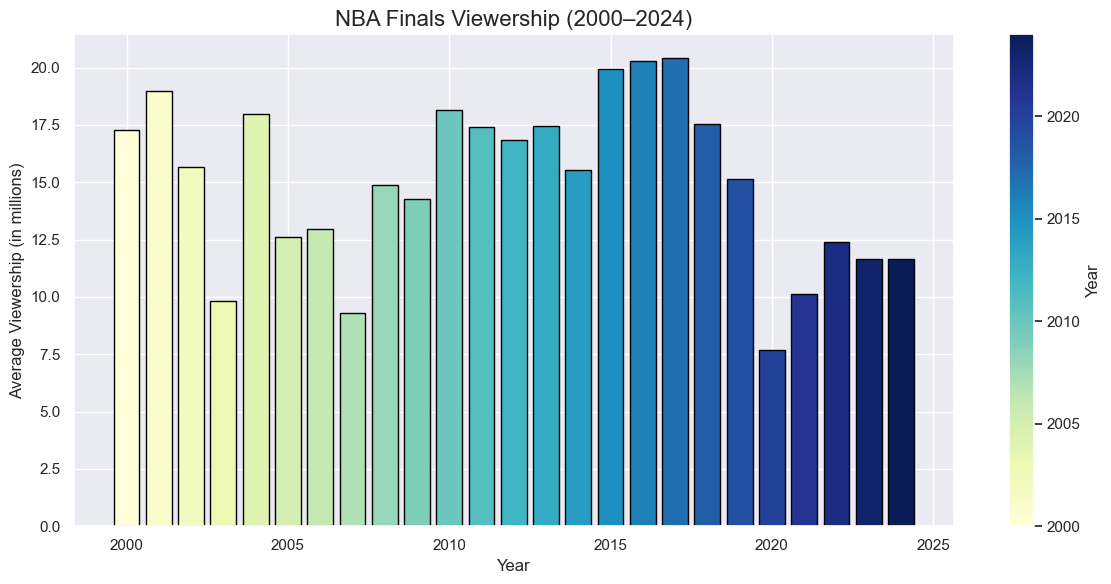

In [24]:
# 시각화 자료
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

# 데이터 불러오기
df = pd.read_csv("nba_finals_viewership.csv")
df["Year"] = df["Year"].astype(int) # int 자료형으로 변환
df["Average Viewership"] = df["Average Viewership"].str.replace("M", "").astype(float) # 문자 M 제거, float 자료형으로 변환

# 스타일 설정
sns.set_theme(style="darkgrid")

# 색상 맵핑: 연도에 따라 색상 지정
norm = mpl.colors.Normalize(vmin=df["Year"].min(), vmax=df["Year"].max())
cmap = plt.cm.YlGnBu
colors = cmap(norm(df["Year"]))

# 바 차트 생성
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(df["Year"], df["Average Viewership"], color=colors, edgecolor='black')

# 컬러바 추가를 위한 mappable 객체 생성
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # 빈 배열로도 괜찮지만 오류를 없애기 위해 ax 지정
cbar = fig.colorbar(sm, ax=ax)  # 🔥 핵심 포인트: fig.colorbar(sm, ax=ax)
cbar.set_label("Year")

# 제목 및 축 설정
ax.set_title("NBA Finals Viewership (2000–2024)", fontsize=16)
ax.set_xlabel("Year")
ax.set_ylabel("Average Viewership (in millions)")

plt.tight_layout()
plt.show()

## Step 3 : March Madness (NCAA) 뷰어십 데이터 크롤링
`March Madness` 시청률 데이터를 웹페이지에서 크롤링하여 `2000-2024년`까지의 연도별 시청률을 구하였습니다. NBA와는 다르게 단 판으로 진행되기 때문에 평균값을 구하지 않고 명시되어 있는 Final의 값을 그대로 추출하였습니다.

사용한 라이브러리로는 NBA와 동일한 방식으로 웹크롤링을 수행하기 위해 `requests`와 `BeautifulSoup`를, 연도와 시청률을 정규식으로 사용하기 위해 `re`를, 그리고 추출한 데이터를 csv 파일로 저장하기 위해 `csv`를 사용하였습니다.

In [25]:
#March Madness 뷰어십
import requests
from bs4 import BeautifulSoup
import re
import csv

# 웹페이지 URL
url = "https://www.sportsmediawatch.com/ncaa-final-four-ratings-history-most-watched-games-cbs-tbs-nbc/"

# HTTP 요청 헤더 설정
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0 Safari/537.36"
}

# 웹페이지 요청
response = requests.get(url, headers=headers)
response.raise_for_status()  # 요청이 성공했는지 확인
soup = BeautifulSoup(response.text, "html.parser") # HTML 파싱

# <h4> 태그에서 텍스트 추출
h4_tags = soup.find_all("h4")

# 연도 추출
years = []
for tag in h4_tags:
    text = tag.get_text()
    match = re.search(r"(20[0-2][0-9])", text)  # 2000~2029 범위 정규식
    if match:
        year = int(match.group(1))
        if 2000 <= year <= 2024:
            years.append(year)

# 뷰어십 평균 추출
results = []
tables = soup.find_all("table", id="olytable")

for i, table in enumerate(tables):
    rows = table.find_all("tr")
    if len(rows) >= 2 and i < len(years):  # 연도 인덱스 범위도 확인
        row = rows[1]  # 두 번째 <tr> (Final 경기 정보)
        cols = row.find_all("td")
        if len(cols) >= 4:
            text = cols[3].get_text(strip=True)
            text = re.sub(r"\([^)]*\)", "", text).strip()  # 괄호 안 제거
            if "M" in text:
                try:
                    num = float(text.replace("M", "").strip())
                    results.append([years[i], f"{num}M"])
                except ValueError:
                    continue


# 출력
for years, avg in results:
    print([years, avg])

# ✅ CSV로 저장
with open("ncaa_final_viewership.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Year", "Viewership"])
    writer.writerows(results)

print("✅ CSV 저장 완료: ncaa_final_viewership.csv")

[2024, '14.823M']
[2023, '14.694M']
[2022, '17.663M']
[2021, '17.081M']
[2019, '19.63M']
[2018, '15.967M']
[2017, '22.998M']
[2016, '17.752M']
[2015, '28.263M']
[2014, '21.196M']
[2013, '23.426M']
[2012, '20.869M']
[2011, '20.055M']
[2010, '23.944M']
[2009, '17.649M']
[2008, '19.501M']
[2007, '19.563M']
[2006, '17.543M']
[2005, '23.895M']
[2004, '17.088M']
[2003, '18.573M']
[2002, '23.686M']
[2001, '23.97M']
[2000, '20.587M']
✅ CSV 저장 완료: ncaa_final_viewership.csv


연도는 `<h4>`에서 연도를 정규식으로 추출하여 `2000-2024년` 사이의 연도를 찾아 추출하였으며, 뷰어십은 `<table>` 태그에서 `tr`을 활용하고 값을 `M`단위로 변환하여 연도별 시청률을 추출하였습니다.

뷰어십의 경우, 닐슨(Nielsen)이라는 분석 기업에서 추적하지 않은 추가 스트리밍 시청이 괄호 () 안에 추가로 기입되어 있었는데, 괄호 안의 값은 제외하였습니다.

NBA와 마찬가지로 추출한 연도와 시청률 데이터를 `ncaa_final_viewership.csv` 파일로 저장하였습니다.

## Step 4 : NCAA Final 시청률 시각화
위에서 추출한 시청률 데이터를 시각화하기 위해, 저장한 csv 파일을 불러와 그래프를 생성하여 연도별 변화를 파악합니다.

NBA 시각화와 마찬가지로, 사용한 라이브러리로는 그래프를 그리기 위해 `matplotlib`와 그래프의 스타일을 개선하기 위해 `seaborn`을 사용하였습니다.

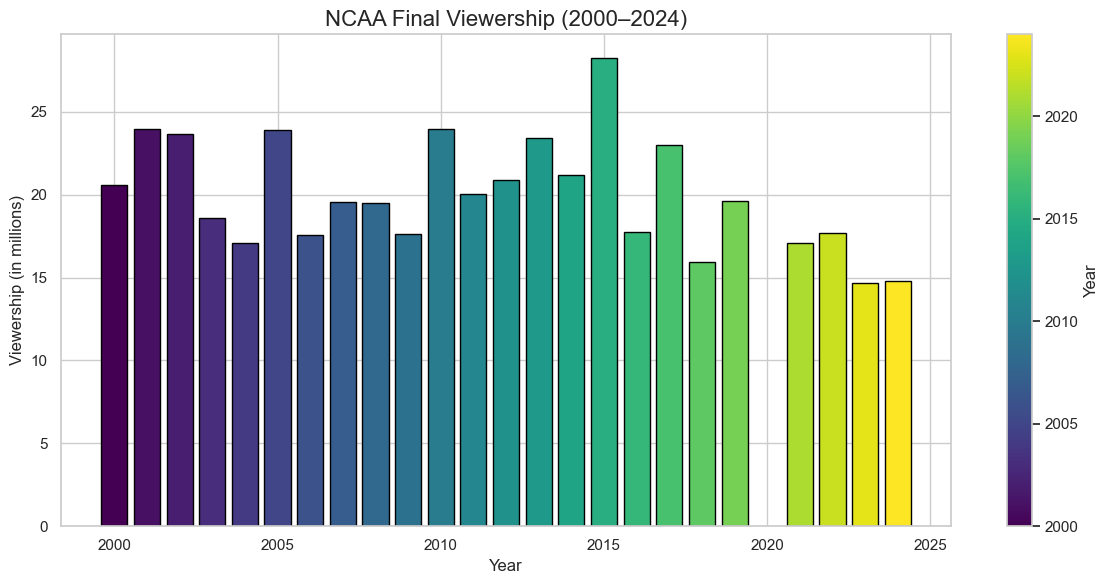

In [26]:
# 시각화 자료
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

# 데이터 불러오기
df = pd.read_csv("ncaa_final_viewership.csv")
df["Year"] = df["Year"].astype(int)
df["Viewership"] = df["Viewership"].str.replace("M", "").astype(float)

# 스타일 설정
sns.set_theme(style="whitegrid")

# 색상 맵핑: 연도에 따라 색상 지정
norm = mpl.colors.Normalize(vmin=df["Year"].min(), vmax=df["Year"].max())
cmap = plt.cm.viridis
colors = cmap(norm(df["Year"]))

# 바 차트 생성
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(df["Year"], df["Viewership"], color=colors, edgecolor='black')

# 컬러바 추가를 위한 mappable 객체 생성
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Year")

# 제목 및 축 설정
ax.set_title("NCAA Final Viewership (2000–2024)", fontsize=16)
ax.set_xlabel("Year")
ax.set_ylabel("Viewership (in millions)")

plt.tight_layout()
plt.show()

## Step 5 : NBA와 NCAA Final Viewership의 직관적 비교
`NBA Finals` 와 `NCAA (March Madness) Final`의 시청률을 좀 더 직관적으로 비교하기 위해 두 개의 시리즈(데이터)를 하나의 시각화 자료에서 동시에 보여지게 하였습니다.

사용된 라이브러리로는 `plotly`로, 두 시리즈를 동시에 비교할 수 있도록함과 마우스 hover시 해당 연도의 각 시리즈의 시청률을 보여지게 하는 동적 시각화를 위해 사용하였습니다.

In [27]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# 데이터 불러오기
nba = pd.read_csv("nba_finals_viewership.csv")
ncaa = pd.read_csv("ncaa_final_viewership.csv")

# 연도 및 시청자 수 데이터 전처리
nba["Year"] = nba["Year"].astype(int)
ncaa["Year"] = ncaa["Year"].astype(int)

nba["Average Viewership"] = nba["Average Viewership"].str.replace("M", "").astype(float)
ncaa["Viewership"] = ncaa["Viewership"].str.replace("M", "").astype(float)

# 그래프 생성
fig = go.Figure()

# NBA 시청률 추가
fig.add_trace(go.Scatter(
    x=nba["Year"],
    y=nba["Average Viewership"],
    mode="lines+markers",
    name="NBA Finals",
    line=dict(color="royalblue", width=3),
    marker=dict(size=8)
))

# NCAA 시청률 추가
fig.add_trace(go.Scatter(
    x=ncaa["Year"],
    y=ncaa["Viewership"],
    mode="lines+markers",
    name="NCAA Final",
    line=dict(color="mediumseagreen", width=3),
    marker=dict(size=8)
))

# 레이아웃 커스터마이징
fig.update_layout(
    title="NBA vs NCAA Finals Viewership Comparison (2000–2024)",
    xaxis_title="Year",
    yaxis_title="Viewership (in millions)",
    template="plotly_white",
    hovermode="x unified",
    legend=dict(
        x=0.02,
        y=0.98,
        bgcolor="rgba(255,255,255,0.6)",
        bordercolor="black",
        borderwidth=1
    )
)

# 그래프 출력
fig.show()


## Summary
NCAA (March Madness) 농구는 해마다 베팅 금액이 증가함에 따라 인기도도 해마다 상승하는 것을 첫 번째 질문에 대한 데이터로 확인할 수 있었으며, 두 번째 질문을 통해 농구 팬들에게 가장 유명한 농구 리그인 NBA의 데이터와 함께 시각적으로, 연도별로 비교해봄으로써 미국 내에서는 NBA보다 NCAA (March Madness)가 더 인기가 많다는 것을 확인할 수 있었습니다.

# Conclusion
이번 프로젝트는 한국에서는 잘 알려지지 않은 NCAA(March Madness) 농구가, 미국 내에서는 얼마나 높은 인기를 얻고 있는지를 확인하고자 진행되었습니다.
프로젝트에서는 두 가지 질문, 즉 연도별 베팅 금액 변화와 NBA와의 시청률 비교를 중심으로 분석을 수행하였습니다.
이를 통해 전 세계적으로 널리 알려진 NBA보다도, 미국 내에서는 March Madness 대학 농구가 더 높은 인기도와 시청률을 기록하고 있다는 사실을 확인할 수 있었습니다.
이러한 데이터 분석을 통해, NCAA 농구가 앞으로도 높은 인기를 유지하며 지속적으로 발전할 가능성이 있음을 알 수 있었고, 많은 스타 플레이어들의 등장 또한 기대해볼 수 있음을 확인할 수 있었습니다.
또한, 이러한 분석은 향후 NCAA 농구 리그의 변화와 발전을 예측하는 데에도 도움이 될 것으로 기대됩니다.